In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from numpy import random
from influencer_games.adaptive_dynamics.visualization import Shell
from influencer_games.utils.utilities import *
from influencer_games.domains.resource_distributions import*

## Resource distribution (beta)

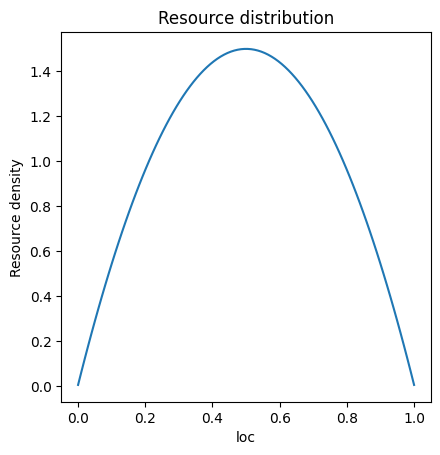

In [2]:
#The resource points
bin_points=np.linspace(.001, .999, 100)

#resource parmaters
resource_parameters=[2,2] #alpha,beta

#Resource distribution
resource_distribution1=resource_distribution_choice(bin_points=bin_points,resource_type='beta',resource_parameters=resource_parameters)

#Plot
domain=bin_points
fig, ax = plt.subplots()
ax.plot(domain,resource_distribution1)
ax.set_box_aspect(1)
plt.title('Resource distribution')
plt.xlabel('loc')
plt.ylabel('Resource density')
plt.show()

## Resource distribution (gaussian)

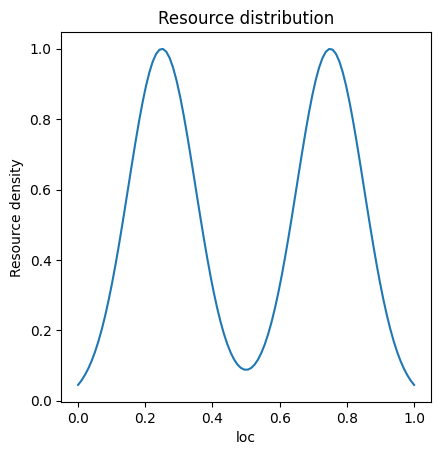

In [3]:
#The resource points
bin_points=np.linspace(.001, .999, 100)
 
#Resource parameters
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#Resource distribution
resource_distribution2=resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

#Plot
domain=bin_points
fig, ax = plt.subplots()
ax.plot(domain,resource_distribution2)
plt.title('Resource distribution')
plt.xlabel('loc')
plt.ylabel('Resource density')
ax.set_box_aspect(1) 
#fig.savefig('1d_bimodal_alpha_05.svg',bbox_inches='tight')
plt.show()


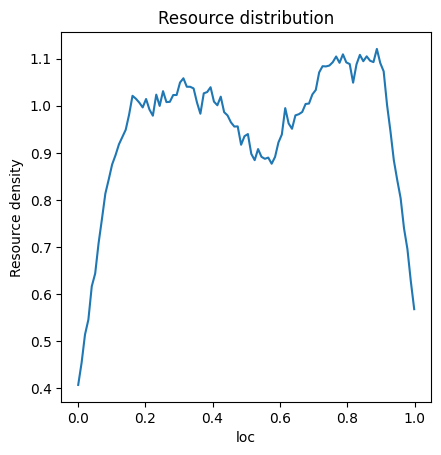

In [4]:
#The resource points
random.seed(1)
bin_points=np.linspace(.001, .999, 100)

#smoothing kernal (resource parameter)
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
y=np.abs(random.uniform(low=0,high=1,size=100)+random.normal(loc=.5,scale=.1,size=100))

#Resource distribution
resource_distribution3=smooth(y,box_pts=20)
domain=bin_points

#Plot
fig, ax = plt.subplots()
ax.set_box_aspect(1)
ax.plot(domain,resource_distribution3)
plt.title('Resource distribution')
plt.xlabel('loc')
plt.ylabel('Resource density')
plt.show()

## Setup:The enviroment and adapative enviroment

The cell below sets up the outer shell for visualizing the the adapative enviroment. 

In [5]:
domain_type='1d'
resource_distribution=resource_distribution2
mean=np.dot(bin_points,resource_distribution)/np.sum(resource_distribution) #mean of the resource distribution


num_agents=3#number of agents
int_agents_pos=player_postion_setup(num_agents=num_agents,setup_type='intial_symmetric_setup',domain_type=domain_type,domain_bounds=0)
int_agents_pos= np.array([.1,.45,.9])
# np.array([.1,.45,.7,.9])
# np.array([.1,.3,.45,.7,.9])
# np.array([.1,.3,.45,.75,.7,.9])
# np.array([.1,.3,.45,.65,.75,.7,.9]) 
# np.array([.1,.25,.3,.35,.45,.65,.75,.7,.9]) 
# np.array([.1,.25,.3,.35,.45,.6,.65,.75,.7,.9]) 
# np.array([.1,.2,.25,.3,.35,.45,.6,.65,.75,.7,.9]) 
# np.array([.1,.2,.25,.3,.35,.45,.6,.65,.75,.7,.8,.9])
# np.array([.115,.115,.21,.21,.29,.29,.391,.391,.609,.609,.71,.71,.79,.79,.885,.885])


infl_configs={"infl_type":"gaussian"} # infleunce type of the agents


parameters=player_parameter_setup(num_agents=num_agents,infl_type=infl_configs["infl_type"],setup_type="intial_symmetric_setup",reach=.25) # parmameters impacting agents reach (their std)
#parameters_custom=np.array([[.1,.2,.3,...]]) #needs to be length num_players

lr_type='cosine'
learning_rate=[1/10000,1/10000,500] # learning rate parameters 
#lr_type='static'
#learning_rate=1/1000
time_steps=5 # number steps for the adaptive dyanamics


vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos.copy(), parameters=parameters,resource_distribution=resource_distribution,bin_points=bin_points,mean=mean,infl_configs=infl_configs,lr_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type=domain_type)

In [6]:
vis.setup_adaptive_env()
vis.field.gradient_accent()
og_pos_matrix=vis.field.pos_matrix
og_grad_matrix=vis.field.grad_matrix
vis.agents_pos=int_agents_pos.copy()
vis.field.agents_pos=int_agents_pos.copy()

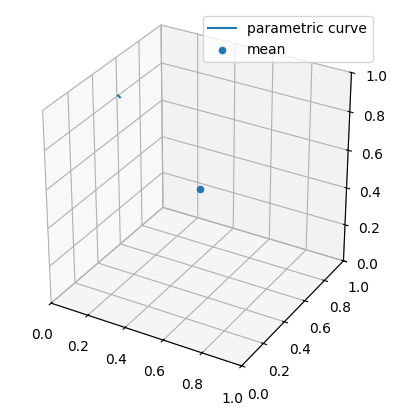

In [7]:
vis.three_players()

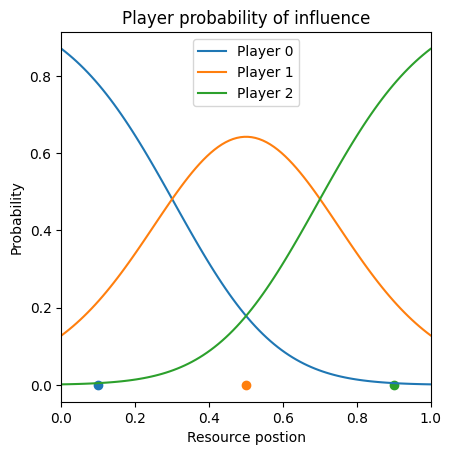

In [8]:
vis.prob_plot(postion=np.array([.1,.5,.9]))

In [9]:
'a'+1

TypeError: can only concatenate str (not "int") to str

## End State plot

Shows the players influence over the resource distribution as they move via adaptive dynamics

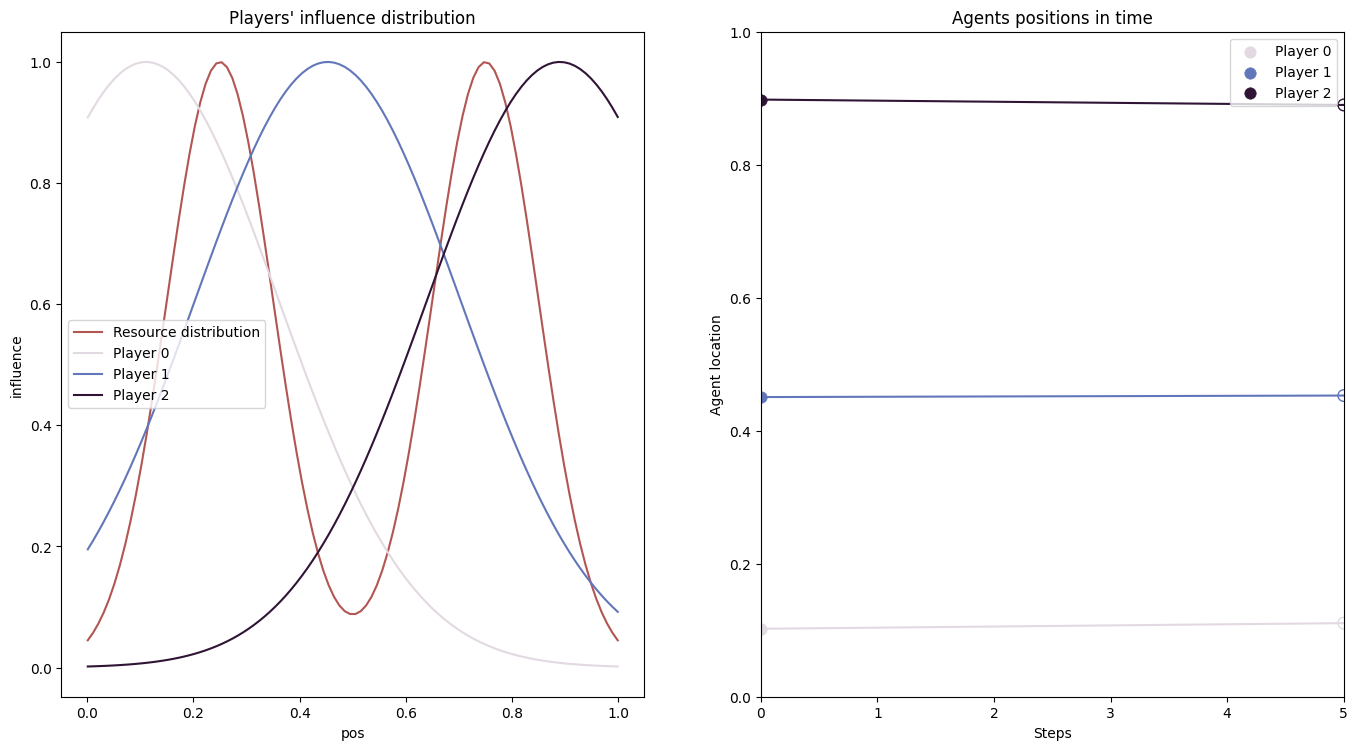

In [ ]:
vis.dist_pos_gif(1)

## Gif State plot

gif of the above plot

In [ ]:
#vis.dist_pos_gif(100)

## Gradient Plot
Plots the agents gradient as they move using adaptive dynamics

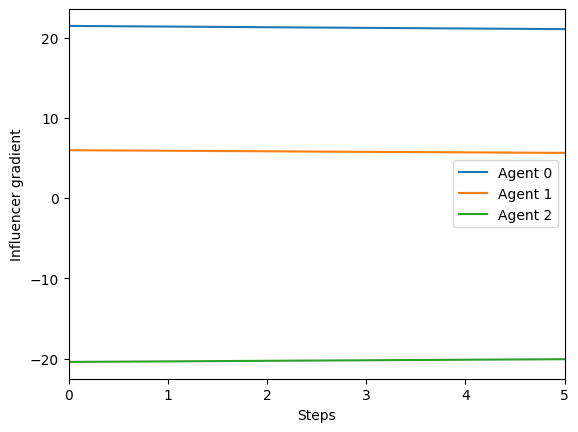

In [ ]:
vis.grad_plot()

## Gradient vector plot for 2 agents (this is a face of the gradient vector space)

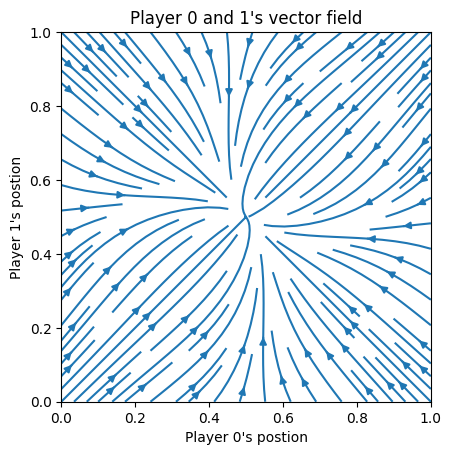

In [ ]:
vis.vect_plot(agent_id=0,parameter_instance=vis.parameters[0],density=1.5)

## Stability plot using the Jacobian (Long run time so try to run less)
Shows the region for stability given different seperation variables $\alpha$

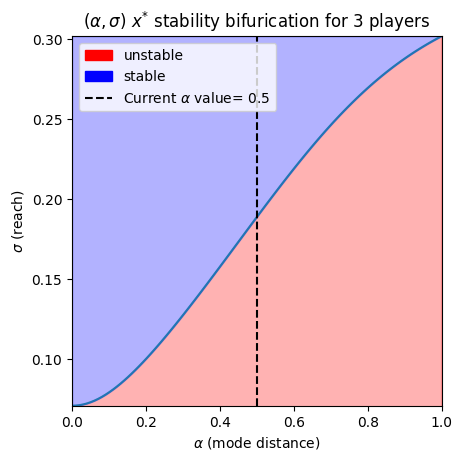

In [ ]:
#vis.mean_stability_birfurcation_rs(r_st=.1,r_end=.5,r_points=200,s_st=0,s_end=1,s_points=100)

fig=vis.first_order_bifurication_plot(vis.parameters,resource_distribution_type="multi_modal_gaussian_distribution_1D",alpha_current=.5,alpha_st=0,alpha_end = 1, varying_paramter_type='mean',
                                        fixed_parameters_lst=[resource_parameters_gaussian[0],resource_parameters_gaussian[2]],name_ads=[],title_ads=[])
fig

## Equalibirium bifirications as we cahnge the reach parameters ($\alpha$=0.5)

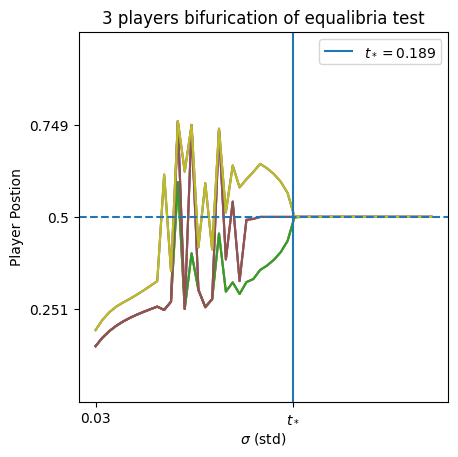

In [ ]:
vis.equalibirum_bifurcation_plot(reach_end=.03,reach_start=.3,reach_num_points=50,num_interations=2000,intitial_pos=vis.agents_pos,name_ads=['test'],title_ads=['test'],refinements=10)
vis.field.pos_matrix=og_pos_matrix
vis.field.grad_matrix=og_grad_matrix
fig

In [ ]:
#fig,test_pos=vis.postion_histogram_for_equalibirum_bifurcation(reach_parameter=.12,num_interations=10000,intitial_pos=vis.agents_pos,title_ads=['asym_pos'],name_ads=[str(.05)+'_sigma','asym_pos'])